# Analysis for Section 5.2 (ctd. for 5.2.3)

In [1]:
%load_ext autoreload
%autoreload 2
import os
import sys
import random
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# src files
from situation_testing.situation_testing import SituationTesting
# plot params
plt.style.use('seaborn-whitegrid')
plt.rc('font', size=11)
plt.rc('legend', fontsize=11)
plt.rc('lines', linewidth=2)
plt.rc('axes', linewidth=2)
plt.rc('axes', edgecolor='k')
plt.rc('xtick.major', width=2)
plt.rc('xtick.major', size=6)
plt.rc('ytick.major', width=2)
plt.rc('ytick.major', size=6)
plt.rc('pdf', fonttype=42)
plt.rc('ps', fonttype=42)

In [2]:
# working directory
wd = os.path.dirname(os.getcwd())
# relevant folders
data_path = os.path.abspath(os.path.join(wd, 'data')) + '\\'
resu_path = os.path.abspath(os.path.join(wd, 'results')) + '\\'

In [3]:
# factual dataset
org_df    = pd.read_csv(data_path + 'LoanApplication_v2.csv', sep='|', )
# counterfactual dataset
org_cf_df = pd.read_csv(data_path + 'counterfactuals\\cf_LoanApplication_v2.csv', sep='|', )

In [ ]:
# org_df[['AnnualSalary', 'AccountBalance', 'Gender']].groupby('Gender').describe().round(2)

In [ ]:
# org_cf_df[['AnnualSalary', 'AccountBalance', 'Gender']].groupby('Gender').describe().round(2)

In [ ]:
# distributions for X1
b = 25
plt.hist(org_df[org_df['Gender'] == 1]['AnnualSalary'], bins=b, alpha=0.9, label=r'fem. $X_1^F$')
plt.hist(org_cf_df[org_cf_df['Gender'] == 1]['AnnualSalary'], bins=b, alpha=0.7, label=r'fem. $X_1^{CF}$')
plt.hist(org_df[org_df['Gender'] == 0]['AnnualSalary'], bins=b, alpha=0.5, label=r'mal. $X_1^F$')
plt.legend(loc='upper right')
plt.ylabel('Frequency')
plt.xlabel(r'Annual salary ($X1$)')

In [ ]:
# distributions X2
b = 25
plt.hist(org_df[org_df['Gender'] == 1]['AccountBalance'], bins=b, alpha=0.9, label=r'fem. $X_2^F$')
plt.hist(org_cf_df[org_cf_df['Gender'] == 1]['AccountBalance'], bins=b, alpha=0.7, label=r'fem. $X_2^{CF}$')
plt.hist(org_df[org_df['Gender'] == 0]['AccountBalance'], bins=b, alpha=0.5, label=r'mal. $X_2^F$')
plt.legend(loc='upper right')
plt.ylabel('Frequency')
plt.xlabel(r'Account balance ($X_2$) for females')

## Regarding k=15 results, $\tau=0.0$

In [26]:
res_df = org_df[['Gender', 'LoanApproval']].copy()
res_df['cf_LoanApproval'] = org_cf_df['LoanApproval'].copy()

In [27]:
# ### attribute-specific params
# feat_trgt = 'LoanApproval'
# feat_trgt_vals = {'positive': 1, 'negative': -1}
# # list of relevant features
# feat_rlvt = ['AnnualSalary', 'AccountBalance']
# # protected feature
# feat_prot = 'Gender'
# # values for the protected feature: use 'non_protected' and 'protected' accordingly
# feat_prot_vals = {'non_protected': 0, 'protected': 1}

### st-specific params
# size of neighborhoods
n = 15
# significance level
alpha = 0.05
# tau diviation
tau = 0.0

In [28]:
print("For k=", n)

test_df    = org_df.copy()
test_cf_df = org_cf_df.copy()

cst = SituationTesting()
cst.setup_baseline(test_df, test_cf_df, nominal_atts=['Gender'], continuous_atts=['AnnualSalary', 'AccountBalance'])

print("CST w/o")
res_df['CSTwo'] = cst.run(target_att='LoanApproval', target_val={'positive': 1, 'negative': -1},
                          sensitive_att='Gender', sensitive_val={'non_protected': 0, 'protected': 1},
                          include_centers=False, 
                          k=n, alpha=alpha, tau=tau)
# num. cases
print(res_df[res_df['CSTwo'] > tau].shape[0])
# get neighnorhoods
cst_wo_knns = cst.res_dict_df_neighbors
# disc stats
cst_wo_stts = cst.get_test_discrimination()
# num. cases (stat sig)
print(cst_wo_stts[(cst_wo_stts['DiscEvi'] == 'Yes') & (cst_wo_stts['StatEvi'] == 'Yes')].shape[0])

print("CST wi/")
res_df['CSTwi'] = cst.run(target_att='LoanApproval', target_val={'positive': 1, 'negative': -1},
                          sensitive_att='Gender', sensitive_val={'non_protected': 0, 'protected': 1},
                          include_centers=True,
                          k=n, alpha=alpha, tau=tau)
# num. cases
print(res_df[res_df['CSTwi'] > tau].shape[0])
# get neighnorhoods
cst_wi_knns = cst.res_dict_df_neighbors
# disc stats
cst_wi_stts = cst.get_test_discrimination()
# num. cases (stat sig)
print(cst_wi_stts[(cst_wi_stts['DiscEvi'] == 'Yes') & (cst_wi_stts['StatEvi'] == 'Yes')].shape[0])

print("=== DONE ===")

For k= 15
CST w/o
288
272
CST wi/
420
272
=== DONE ===


In [ ]:
# 20/11: we already have two tables for summary stats | below we just looks at common c's | can be added

# # Set1: c is in CST w/o and w/
# set1 = res_df[(res_df['CSTwo'] > tau) & (res_df['CSTwi'] > tau)].index.to_list()

# # check
# print('All CST w/o cases in CST w/?')
# if res_df[res_df['CSTwo'] > tau].shape[0] == len(set1):
#     print('Yes')
# else:
#     print('No')

# # Set2: c is in CST w/ but not in CST w/o
# set2 = [c for c in res_df[(res_df['CSTwi'] > tau)].index.to_list() if c not in set1]
# print(len(set2), "are only in CST w/")

# # check
# print((len(set1) + len(set2)) == res_df[res_df['CSTwi'] > tau].shape[0])

In [ ]:
# c's in CST w/o and w/ THAT ARE STATISTICALLY SIGNIFICANT
temp_s1 = cst_wi_stts[(cst_wi_stts['DiscEvi'] == 'Yes') & (cst_wi_stts['StatEvi'] == 'Yes')]['individual'].to_list()
temp_s2 = cst_wo_stts[(cst_wo_stts['DiscEvi'] == 'Yes') & (cst_wo_stts['StatEvi'] == 'Yes')]['individual'].to_list()
temp_s3 = [c for c in temp_s1 if c in temp_s2]
# Are these the same for both CST versions?
print(len(temp_s1) == len(temp_s3))

In [ ]:
# # Summary stats for c's in both CST w/ and w/o (i.e., set1): let's look at both versions

# print("For k=", n)

# nsf = 2
# list_temp_df = []
# var = ['AnnualSalary', 'AccountBalance', 'LoanApproval']

# for c in set1:
    
#     temp_df = {}
    
#     temp_ctr_wo = org_df.iloc[cst_wo_knns[c]['ctr_idx'], :][var]
#     temp_tst_wo = org_cf_df.iloc[cst_wo_knns[c]['tst_idx'], :][var]
    
#     temp_ctr_wi = org_df.iloc[cst_wi_knns[c]['ctr_idx'], :][var]
#     temp_ctr_wi = temp_ctr_wi.append(org_df.loc[c, var])
# #     print(org_df.loc[c, var])
#     temp_tst_wi = org_cf_df.iloc[cst_wi_knns[c]['tst_idx'], :][var]
#     temp_tst_wi = temp_tst_wi.append(org_cf_df.loc[c, var])
# #     print(org_cf_df.loc[c, var])
        
#     temp_df['id'] = c
#     # num. of negative decisions
#     temp_df['neg_y_ctr_wo'] = temp_ctr_wo[temp_ctr_wo['LoanApproval'] == -1].shape[0]
#     temp_df['neg_y_tst_wo'] = temp_tst_wo[temp_tst_wo['LoanApproval'] == -1].shape[0]
#     temp_df['neg_y_ctr_wi'] = temp_ctr_wi[temp_ctr_wi['LoanApproval'] == -1].shape[0]
#     temp_df['neg_y_tst_wi'] = temp_tst_wi[temp_tst_wi['LoanApproval'] == -1].shape[0]
#     # prp. of negative decisions
#     temp_df['p_ctr_wo'] = round(temp_df['neg_y_ctr_wo'] / n, nsf)
#     temp_df['p_tst_wo'] = round(temp_df['neg_y_tst_wo'] / n, nsf)
#     temp_df['p_ctr_wi'] = round(temp_df['neg_y_ctr_wi'] / (n + 1), nsf)
#     temp_df['p_tst_wi'] = round(temp_df['neg_y_tst_wi'] / (n + 1), nsf)
        
#     for v in ['AnnualSalary', 'AccountBalance']:
#         temp_df['avg_ctr_wo_' + v] = round(temp_ctr_wo.mean()[v], nsf)
#         temp_df['std_ctr_wo_' + v] = round(temp_ctr_wo.std()[v], nsf)
#         temp_df['avg_tst_wo_' + v] = round(temp_tst_wo.mean()[v], nsf)
#         temp_df['std_tst_wo_' + v] = round(temp_tst_wo.std()[v], nsf)
        
#         temp_df['avg_ctr_wi_' + v] = round(temp_ctr_wi.mean()[v], nsf)
#         temp_df['std_ctr_wi_' + v] = round(temp_ctr_wi.std()[v], nsf)
#         temp_df['avg_tst_wi_' + v] = round(temp_tst_wi.mean()[v], nsf)
#         temp_df['std_tst_wi_' + v] = round(temp_tst_wi.std()[v], nsf)
        
#     list_temp_df.append(temp_df)

# set1_summary_stats = pd.DataFrame(list_temp_df)

# # set1_summary_stats.head(5)

In [ ]:
# set1_summary_stats.mean().round(2)

In [ ]:
# # Summary stats for c's in only CST w/ (i.e., set2): let's look at both versions

# print("For k=", n)

# nsf = 2
# list_temp_df = []
# var = ['AnnualSalary', 'AccountBalance', 'LoanApproval']

# for c in set2:
    
#     temp_df = {}
    
#     temp_ctr_wo = org_df.iloc[cst_wo_knns[c]['ctr_idx'], :][var]
#     temp_tst_wo = org_cf_df.iloc[cst_wo_knns[c]['tst_idx'], :][var]
    
#     temp_ctr_wi = org_df.iloc[cst_wi_knns[c]['ctr_idx'], :][var]
#     temp_ctr_wi = temp_ctr_wi.append(org_df.loc[c, var])
# #     print(org_df.loc[c, var])
#     temp_tst_wi = org_cf_df.iloc[cst_wi_knns[c]['tst_idx'], :][var]
#     temp_tst_wi = temp_tst_wi.append(org_cf_df.loc[c, var])
# #     print(org_cf_df.loc[c, var])
        
#     temp_df['id'] = c
#     # num. of negative decisions
#     temp_df['neg_y_ctr_wo'] = temp_ctr_wo[temp_ctr_wo['LoanApproval'] == -1].shape[0]
#     temp_df['neg_y_tst_wo'] = temp_tst_wo[temp_tst_wo['LoanApproval'] == -1].shape[0]
#     temp_df['neg_y_ctr_wi'] = temp_ctr_wi[temp_ctr_wi['LoanApproval'] == -1].shape[0]
#     temp_df['neg_y_tst_wi'] = temp_tst_wi[temp_tst_wi['LoanApproval'] == -1].shape[0]
#     # prp. of negative decisions
#     temp_df['p_ctr_wo'] = round(temp_df['neg_y_ctr_wo'] / n, nsf)
#     temp_df['p_tst_wo'] = round(temp_df['neg_y_tst_wo'] / n, nsf)
#     temp_df['p_ctr_wi'] = round(temp_df['neg_y_ctr_wi'] / (n + 1), nsf)
#     temp_df['p_tst_wi'] = round(temp_df['neg_y_tst_wi'] / (n + 1), nsf)
    
#     for v in ['AnnualSalary', 'AccountBalance']:
#         temp_df['avg_ctr_wo_' + v] = round(temp_ctr_wo.mean()[v], nsf)
#         temp_df['std_ctr_wo_' + v] = round(temp_ctr_wo.std()[v], nsf)
#         temp_df['avg_tst_wo_' + v] = round(temp_tst_wo.mean()[v], nsf)
#         temp_df['std_tst_wo_' + v] = round(temp_tst_wo.std()[v], nsf)
        
#         temp_df['avg_ctr_wi_' + v] = round(temp_ctr_wi.mean()[v], nsf)
#         temp_df['std_ctr_wi_' + v] = round(temp_ctr_wi.std()[v], nsf)
#         temp_df['avg_tst_wi_' + v] = round(temp_tst_wi.mean()[v], nsf)
#         temp_df['std_tst_wi_' + v] = round(temp_tst_wi.std()[v], nsf)
        
#     list_temp_df.append(temp_df)

# set2_summary_stats = pd.DataFrame(list_temp_df)

# # set2_summary_stats.head(5)

In [ ]:
# set2_summary_stats.mean().round(2)

## The impact of $|k|$, given $\tau$

In [58]:
### data
test_df    = org_df.copy()
test_cf_df = org_cf_df.copy()

### parameters
alpha = 0.05
tau   = 0.0
k_l = 1
k_u = 250

### ST object
st = SituationTesting()
st.setup_baseline(test_df, nominal_atts=['Gender'], continuous_atts=['AnnualSalary', 'AccountBalance'])

### CST object
cst = SituationTesting()
cst.setup_baseline(test_df, test_cf_df, nominal_atts=['Gender'], continuous_atts=['AnnualSalary', 'AccountBalance'])

In [59]:
# d1: discrimination definition based on the literal comparison
# d2: discrimination definition based on statistical significance

temp_k = []

for k in range(k_l, k_u + 1):
    print(k)
    
    # --- ST
    st.run(target_att='LoanApproval', target_val={'positive': 1, 'negative': -1},
           sensitive_att='Gender', sensitive_val={'non_protected': 0, 'protected': 1}, 
           k=k, alpha=alpha, tau=tau)
    
    temp_test_disc_st = st.get_test_discrimination()
    
    # --- CST without
    cst.run(target_att='LoanApproval', target_val={'positive': 1, 'negative': -1}, 
            sensitive_att='Gender', sensitive_val={'non_protected': 0, 'protected': 1},
            include_centers=False, 
            k=k, alpha=alpha, tau=tau)
    
    temp_test_disc_wo = cst.get_test_discrimination()
    
    # --- CST with
    cst.run(target_att='LoanApproval', target_val={'positive': 1, 'negative': -1}, 
            sensitive_att='Gender', sensitive_val={'non_protected': 0, 'protected': 1},
            include_centers=True, 
            k=k, alpha=alpha, tau=tau)
    
    temp_test_disc_wi = cst.get_test_discrimination()
    
    # --- CF
    cf = cst.res_counterfactual_unfairness
    
    # --- results
    temp_k.append(
        {
        'k': k,
        # Num. of discrimination cases
        'ST_d1_num': temp_test_disc_st[temp_test_disc_st['DiscEvi'] == 'Yes'].shape[0],
        'CST_wo_d1_num': temp_test_disc_wo[temp_test_disc_wo['DiscEvi'] == 'Yes'].shape[0],
        'CST_wi_d1_num': temp_test_disc_wi[temp_test_disc_wi['DiscEvi'] == 'Yes'].shape[0],
        'ST_d2_num': temp_test_disc_st[(temp_test_disc_st['DiscEvi'] == 'Yes') & (temp_test_disc_st['StatEvi'] == 'Yes')].shape[0],
        'CST_wo_d2_num': temp_test_disc_wo[(temp_test_disc_wo['DiscEvi'] == 'Yes') & (temp_test_disc_wo['StatEvi'] == 'Yes')].shape[0],
        'CST_wi_d2_num': temp_test_disc_wi[(temp_test_disc_wi['DiscEvi'] == 'Yes') & (temp_test_disc_wi['StatEvi'] == 'Yes')].shape[0],
        'CF_d1_num': sum(cf == 1),
        'CF_d2_num': temp_test_disc_wi[temp_test_disc_wi['individual'].isin(cf[cf == 1].index.to_list()) & (temp_test_disc_wi['StatEvi'] == 'Yes')].shape[0],
        'CF_avgCI_l': temp_test_disc_wi['CI_2st'].apply(lambda x: x[0]).mean(),
        'CF_avgCI_u': temp_test_disc_wi['CI_2st'].apply(lambda x: x[-1]).mean(),
        # Avg. delta p
        'ST_d1_diff': temp_test_disc_st[temp_test_disc_st['DiscEvi'] == 'Yes']['delta_p'].mean(),
        'CST_wo_d1_diff': temp_test_disc_wo[temp_test_disc_wo['DiscEvi'] == 'Yes']['delta_p'].mean(),
        'CST_wi_d1_diff': temp_test_disc_wi[temp_test_disc_wi['DiscEvi'] == 'Yes']['delta_p'].mean(),
        'ST_d2_diff': temp_test_disc_st[(temp_test_disc_st['DiscEvi'] == 'Yes') & (temp_test_disc_st['StatEvi'] == 'Yes')]['delta_p'].mean(),
        'CST_wo_d2_diff': temp_test_disc_wo[(temp_test_disc_wo['DiscEvi'] == 'Yes') & (temp_test_disc_wo['StatEvi'] == 'Yes')]['delta_p'].mean(),
        'CST_wi_d2_diff': temp_test_disc_wi[(temp_test_disc_wi['DiscEvi'] == 'Yes') & (temp_test_disc_wi['StatEvi'] == 'Yes')]['delta_p'].mean(),
        }
    )
    
    del temp_test_disc_wo, temp_test_disc_wi, temp_test_disc_st, cf

k_results = pd.DataFrame(temp_k)
del temp_k

print('=== DONE ===')

# save as Excel
k_results.to_csv(resu_path + '\\res_LoanApplication_k_analysis.csv', sep='|', index=True)
k_results.head(5)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
=== DONE ===


,k,ST_d1_num,CST_wo_d1_num,CST_wi_d1_num,ST_d2_num,CST_wo_d2_num,CST_wi_d2_num,CF_d1_num,CF_d2_num,CF_avgCI_l,CF_avgCI_u,ST_d1_diff,CST_wo_d1_diff,CST_wi_d1_diff,ST_d2_diff,CST_wo_d2_diff,CST_wi_d2_diff
0,1,13,235,383,13,235,228,376,228,0.115704,0.241189,1.000000,1.000000,0.797650,1.000000,1.000000,1.000000
1,2,20,246,391,7,221,233,376,231,0.110550,0.217749,0.675000,0.949187,0.718670,1.000000,1.000000,0.979971
2,3,31,255,397,15,234,243,376,234,0.109949,0.204304,0.537634,0.915033,0.677582,0.755556,0.967236,0.948560
3,4,32,258,398,25,245,251,376,236,0.112013,0.194296,0.562500,0.906008,0.658794,0.640000,0.940816,0.927490
4,5,39,265,402,27,254,259,376,239,0.113175,0.188787,0.517949,0.886792,0.643035,0.644444,0.916535,0.906049


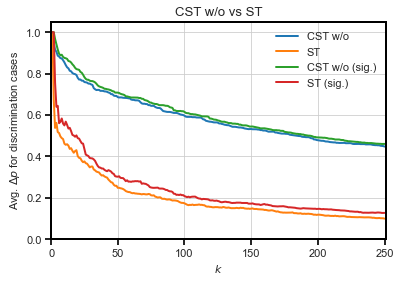

In [60]:
plt.plot(k_results['k'], k_results['CST_wo_d1_diff'], label='CST w/o')
plt.plot(k_results['k'], k_results['ST_d1_diff'], label='ST')
plt.plot(k_results['k'], k_results['CST_wo_d2_diff'], label='CST w/o (sig.)')
plt.plot(k_results['k'], k_results['ST_d2_diff'], label='ST (sig.)')
plt.xlim(0, k_u+1)
plt.xlabel("$k$")
plt.ylim(0.0, 1.05)
plt.ylabel("Avg. $\Delta p$ for discrimination cases")
plt.legend()
plt.title('CST w/o vs ST')
plt.show()

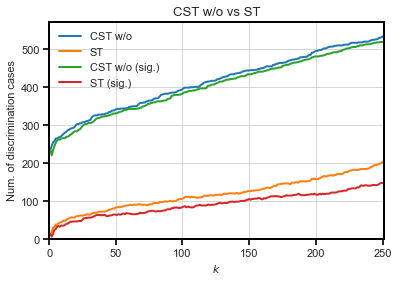

In [61]:
plt.plot(k_results['k'], k_results['CST_wo_d1_num'], label='CST w/o')
plt.plot(k_results['k'], k_results['ST_d1_num'], label='ST')
plt.plot(k_results['k'], k_results['CST_wo_d2_num'], label='CST w/o (sig.)')
plt.plot(k_results['k'], k_results['ST_d2_num'], label='ST (sig.)')
plt.xlim(0, k_u+1)
plt.xlabel("$k$")
plt.ylim(0, k_results.iloc[-1].max() + 15)
# plt.ylim(k_results.iloc[0].min() - 5, k_results.iloc[-1].max() + 5)
plt.ylabel("Num. of discrimination cases")
plt.legend()
plt.title('CST w/o vs ST')
plt.show()

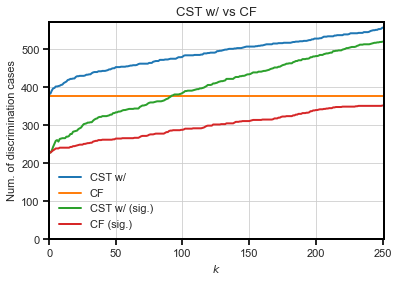

In [62]:
plt.plot(k_results['k'], k_results['CST_wi_d1_num'], label='CST w/')
plt.plot(k_results['k'], k_results['CF_d1_num'], label='CF')
plt.plot(k_results['k'], k_results['CST_wi_d2_num'], label='CST w/ (sig.)')
plt.plot(k_results['k'], k_results['CF_d2_num'], label='CF (sig.)')
plt.xlim(0, k_u+1)
plt.xlabel("$k$")
plt.ylim(0, k_results.iloc[-1].max() + 15)
# plt.ylim(k_results.iloc[0].min() - 5, k_results.iloc[-1].max() + 5)
plt.ylabel("Num. of discrimination cases")
plt.legend()
plt.title('CST w/ vs CF')
plt.show()

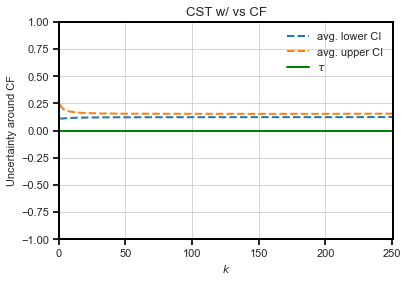

In [63]:
plt.plot(k_results['k'], k_results['CF_avgCI_l'], label='avg. lower CI', linestyle='--')
plt.plot(k_results['k'], k_results['CF_avgCI_u'], label='avg. upper CI', linestyle='--')
# plt.plot(k_results['k'], k_results['CF_d1_num'], label='CF')
# plt.plot(k_results['k'], k_results['CF_d2_num'], label='CF (sig.)')
plt.axhline(y=0.0, label='$\\tau$', color='g')
plt.xlim(0, k_u+1)
plt.xlabel("$k$")
plt.ylim(-1, 1)
# plt.ylim(k_results.iloc[0].min() - 5, k_results.iloc[-1].max() + 5)
plt.ylabel("Uncertainty around CF")
plt.legend()
plt.title('CST w/ vs CF')
plt.show()

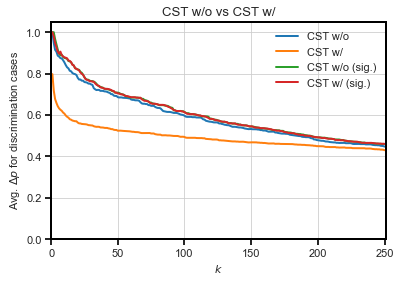

In [64]:
plt.plot(k_results['k'], k_results['CST_wo_d1_diff'], label='CST w/o')
plt.plot(k_results['k'], k_results['CST_wi_d1_diff'], label='CST w/')
plt.plot(k_results['k'], k_results['CST_wo_d2_diff'], label='CST w/o (sig.)')
plt.plot(k_results['k'], k_results['CST_wi_d2_diff'], label='CST w/ (sig.)')
plt.xlim(0, k_u+1)
plt.xlabel("$k$")
plt.ylim(0.0, 1.05)
plt.ylabel("Avg. $\Delta p$ for discrimination cases")
plt.legend()
plt.title('CST w/o vs CST w/')
plt.show()

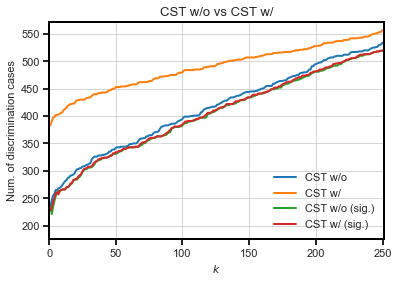

In [65]:
plt.plot(k_results['k'], k_results['CST_wo_d1_num'], label='CST w/o')
plt.plot(k_results['k'], k_results['CST_wi_d1_num'], label='CST w/')
plt.plot(k_results['k'], k_results['CST_wo_d2_num'], label='CST w/o (sig.)')
plt.plot(k_results['k'], k_results['CST_wi_d2_num'], label='CST w/ (sig.)')
plt.xlim(0, k_u+1)
plt.xlabel("$k$")
plt.ylim(175, k_results.iloc[-1].max() + 15)
# plt.ylim(k_results.iloc[0].min() - 5, k_results.iloc[-1].max() + 5)
plt.ylabel("Num. of discrimination cases")
plt.legend()
plt.title('CST w/o vs CST w/')
plt.show()

## The impact of $|\tau|$, given $K$

In [ ]:
### data
test_df    = org_df.copy()
test_cf_df = org_cf_df.copy()

### parameters
alpha = 0.05
tau   = 0.0
n = 15

### CST object
cst = SituationTesting()
cst.setup_baseline(test_df, test_cf_df, nominal_atts=['Gender'], continuous_atts=['AnnualSalary', 'AccountBalance'])

In [ ]:
# d1: discrimination definition based on the literal comparison
# d2: discrimination definition based on statistical significance

temp_tau = []

for tau in np.arange(0.0, 1.05, 0.05): 
    print(round(tau, 2))
    
    # --- CST without
    cst.run(target_att='LoanApproval', target_val={'positive': 1, 'negative': -1}, 
            sensitive_att='Gender', sensitive_val={'non_protected': 0, 'protected': 1},
            include_centers=False, 
            k=n, alpha=alpha, tau=round(tau, 2))
    
    temp_test_disc_wo = cst.get_test_discrimination()
    
    # --- CST with
    cst.run(target_att='LoanApproval', target_val={'positive': 1, 'negative': -1}, 
            sensitive_att='Gender', sensitive_val={'non_protected': 0, 'protected': 1},
            include_centers=True, 
            k=n, alpha=alpha, tau=round(tau, 2))
    
    temp_test_disc_wi = cst.get_test_discrimination()
    
    # --- results
    temp_tau.append(
        {
        'tau': round(tau, 2),
        # Num. of discrimination cases
        'CST_wo_d1_num': temp_test_disc_wo[temp_test_disc_wo['DiscEvi'] == 'Yes'].shape[0],
        'CST_wi_d1_num': temp_test_disc_wi[temp_test_disc_wi['DiscEvi'] == 'Yes'].shape[0],
        'CST_wo_d2_num': temp_test_disc_wo[(temp_test_disc_wo['DiscEvi'] == 'Yes') & (temp_test_disc_wo['StatEvi'] == 'Yes')].shape[0],
        'CST_wi_d2_num': temp_test_disc_wi[(temp_test_disc_wi['DiscEvi'] == 'Yes') & (temp_test_disc_wi['StatEvi'] == 'Yes')].shape[0],
        # Avg. delta p
        'CST_wo_d1_diff': temp_test_disc_wo[temp_test_disc_wo['DiscEvi'] == 'Yes']['org_diff'].mean(),
        'CST_wi_d1_diff': temp_test_disc_wi[temp_test_disc_wi['DiscEvi'] == 'Yes']['org_diff'].mean(),
        'CST_wo_d2_diff': temp_test_disc_wo[(temp_test_disc_wo['DiscEvi'] == 'Yes') & (temp_test_disc_wo['StatEvi'] == 'Yes')]['org_diff'].mean(),
        'CST_wi_d2_diff': temp_test_disc_wi[(temp_test_disc_wi['DiscEvi'] == 'Yes') & (temp_test_disc_wi['StatEvi'] == 'Yes')]['org_diff'].mean(),
        }
    )
    
    del temp_test_disc_wo, temp_test_disc_wi

tau_results = pd.DataFrame(temp_tau)
del temp_tau

print('=== DONE ===')

In [ ]:
plt.plot(tau_results['tau'], tau_results['CST_wo_d1_diff'], label='CST w/o (D1)')
plt.plot(tau_results['tau'], tau_results['CST_wi_d1_diff'], label='CST (D1)')
plt.plot(tau_results['tau'], tau_results['CST_wo_d2_diff'], label='CST w/o (D2)')
plt.plot(tau_results['tau'], tau_results['CST_wi_d2_diff'], label='CST (D2)')
plt.xlim(-0.05, 1.05)
plt.xlabel(f"$\\tau$ (with $k$={n})")
plt.ylim(0.0, 1.05)
plt.ylabel("Avg. $\Delta p$ for discrimination cases")
plt.legend()
# plt.title('multiple plots')
plt.show()

In [ ]:
plt.plot(tau_results['tau'], tau_results['CST_wo_d1_num'], label='CST w/o (D1)')
plt.plot(tau_results['tau'], tau_results['CST_wi_d1_num'], label='CST (D1)')
plt.plot(tau_results['tau'], tau_results['CST_wo_d2_num'], label='CST w/o (D2)')
plt.plot(tau_results['tau'], tau_results['CST_wi_d2_num'], label='CST (D1)')
plt.xlim(-0.05, 1.05)
plt.xlabel(f"$\\tau$ (with $k$={n})")
# plt.ylim(200, tau_results.iloc[-1].max() + 15)
plt.ylabel("Num. of discrimination cases")
plt.legend()
# plt.title('multiple plots')
plt.show()

In [ ]:
# The tau results further reinforce the results: notce the drop in CST w/ under Def 1!!!

In [ ]:
### data
test_df    = org_df.copy()
test_cf_df = org_cf_df.copy()

### parameters
alpha = 0.05
tau   = 0.0
n = 250

### CST object
cst = SituationTesting()
cst.setup_baseline(test_df, test_cf_df, nominal_atts=['Gender'], continuous_atts=['AnnualSalary', 'AccountBalance'])

In [ ]:
# d1: discrimination definition based on the literal comparison
# d2: discrimination definition based on statistical significance

temp_tau = []

for tau in np.arange(0.0, 1.05, 0.05): 
    print(round(tau, 2))
    
    # --- CST without
    cst.run(target_att='LoanApproval', target_val={'positive': 1, 'negative': -1}, 
            sensitive_att='Gender', sensitive_val={'non_protected': 0, 'protected': 1},
            include_centers=False, 
            k=n, alpha=alpha, tau=round(tau, 2))
    
    temp_test_disc_wo = cst.get_test_discrimination()
    
    # --- CST with
    cst.run(target_att='LoanApproval', target_val={'positive': 1, 'negative': -1}, 
            sensitive_att='Gender', sensitive_val={'non_protected': 0, 'protected': 1},
            include_centers=True, 
            k=n, alpha=alpha, tau=round(tau, 2))
    
    temp_test_disc_wi = cst.get_test_discrimination()
    
    # --- results
    temp_tau.append(
        {
        'tau': round(tau, 2),
        # Num. of discrimination cases
        'CST_wo_d1_num': temp_test_disc_wo[temp_test_disc_wo['DiscEvi'] == 'Yes'].shape[0],
        'CST_wi_d1_num': temp_test_disc_wi[temp_test_disc_wi['DiscEvi'] == 'Yes'].shape[0],
        'CST_wo_d2_num': temp_test_disc_wo[(temp_test_disc_wo['DiscEvi'] == 'Yes') & (temp_test_disc_wo['StatEvi'] == 'Yes')].shape[0],
        'CST_wi_d2_num': temp_test_disc_wi[(temp_test_disc_wi['DiscEvi'] == 'Yes') & (temp_test_disc_wi['StatEvi'] == 'Yes')].shape[0],
        # Avg. delta p
        'CST_wo_d1_diff': temp_test_disc_wo[temp_test_disc_wo['DiscEvi'] == 'Yes']['org_diff'].mean(),
        'CST_wi_d1_diff': temp_test_disc_wi[temp_test_disc_wi['DiscEvi'] == 'Yes']['org_diff'].mean(),
        'CST_wo_d2_diff': temp_test_disc_wo[(temp_test_disc_wo['DiscEvi'] == 'Yes') & (temp_test_disc_wo['StatEvi'] == 'Yes')]['org_diff'].mean(),
        'CST_wi_d2_diff': temp_test_disc_wi[(temp_test_disc_wi['DiscEvi'] == 'Yes') & (temp_test_disc_wi['StatEvi'] == 'Yes')]['org_diff'].mean(),
        }
    )
    
    del temp_test_disc_wo, temp_test_disc_wi

tau_results = pd.DataFrame(temp_tau)
del temp_tau

print('=== DONE ===')

In [ ]:
plt.plot(tau_results['tau'], tau_results['CST_wo_d1_diff'], label='CST w/o (D1)')
plt.plot(tau_results['tau'], tau_results['CST_wi_d1_diff'], label='CST (D1)')
plt.plot(tau_results['tau'], tau_results['CST_wo_d2_diff'], label='CST w/o (D2)')
plt.plot(tau_results['tau'], tau_results['CST_wi_d2_diff'], label='CST (D2)')
plt.xlim(-0.05, 1.05)
plt.xlabel(f"$\\tau$ (with $k$={n})")
plt.ylim(0.0, 1.05)
plt.ylabel("Avg. $\Delta p$ for discrimination cases")
plt.legend()
# plt.title('multiple plots')
plt.show()

In [ ]:
plt.plot(tau_results['tau'], tau_results['CST_wo_d1_num'], label='CST w/o (D1)')
plt.plot(tau_results['tau'], tau_results['CST_wi_d1_num'], label='CST (D1)')
plt.plot(tau_results['tau'], tau_results['CST_wo_d2_num'], label='CST w/o (D2)')
plt.plot(tau_results['tau'], tau_results['CST_wi_d2_num'], label='CST (D1)')
plt.xlim(-0.05, 1.05)
plt.xlabel(f"$\\tau$ (with $k$={n})")
# plt.ylim(200, tau_results.iloc[-1].max() + 15)
plt.ylabel("Num. of discrimination cases")
plt.legend()
# plt.title('multiple plots')
plt.show()

### EOF